## 从零实现

In [1]:
import random
import torch
from d2l import torch as d2l

### 生成数据集

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)
features[0], labels[0]

(tensor([ 0.0554, -0.5693]), tensor([6.2578]))

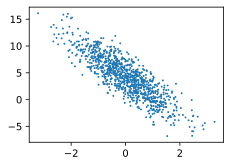

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

### 读取数据集

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
#     d = torch.tensor(indices).reshape(-1,10)
#     print(d)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
#         print(batch_indices)
    yield features[batch_indices], labels[batch_indices]

In [5]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.0226,  0.2629],
        [ 0.0083, -2.7397],
        [-0.7027,  1.9539],
        [ 0.7662,  1.0101],
        [-0.6523, -0.0950],
        [-0.2524,  0.9446],
        [ 1.8979,  0.9320],
        [ 0.9621,  0.2207],
        [-0.8066,  0.3878],
        [ 1.3632,  0.1578]]) 
 tensor([[ 1.2523],
        [13.5257],
        [-3.8637],
        [ 2.3109],
        [ 3.2241],
        [ 0.4669],
        [ 4.8217],
        [ 5.3586],
        [ 1.2832],
        [ 6.3869]])


### 初始化模型参数

In [6]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b

(tensor([[ 0.0011],
         [-0.0135]], requires_grad=True),
 tensor([0.], requires_grad=True))

### 定义模型

In [7]:
def linreg(X, w, b):
    return torch.matmul(X, w)+b

### 定义损失函数

In [8]:
def squared_loss(y_hat, y):
    return (y_hat-y.reshape(y_hat.shape)) ** 2 / 2

### 定义优化算法

In [9]:
def sgd(params, lr, batch_size):
    with torch.no_grad():  # 所有计算得出的tensor的requires_grad都自动设置为False
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 训练

In [10]:
lr = 0.03
num_epochs = 1000
net = linreg
loss = squared_loss

In [11]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        if epoch % 50 == 0:
            print(f'epoch {epoch}, loss {float(train_l.mean()):f}')

epoch 0, loss 15.651887
epoch 50, loss 0.777480
epoch 100, loss 0.034502
epoch 150, loss 0.002240
epoch 200, loss 0.000182
epoch 250, loss 0.000057
epoch 300, loss 0.000050
epoch 350, loss 0.000049
epoch 400, loss 0.000049
epoch 450, loss 0.000049
epoch 500, loss 0.000048
epoch 550, loss 0.000048
epoch 600, loss 0.000049
epoch 650, loss 0.000049
epoch 700, loss 0.000048
epoch 750, loss 0.000049
epoch 800, loss 0.000049
epoch 850, loss 0.000048
epoch 900, loss 0.000049
epoch 950, loss 0.000048


In [12]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0002,  0.0009], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0005], grad_fn=<RsubBackward1>)


## 简洁实现